<a href="https://colab.research.google.com/github/ncphung1405/Do_an_PTDL_python-/blob/main/thong_ke_suy_dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ĐỒ ÁN KẾT THÚC HỌC PHẦN**

***Thống kê suy diễn***

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Diet_R.csv')

In [ ]:
df.sample(15)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
23,34,0,54,173,63,2,59.4
28,39,0,30,161,76,2,72.7
64,50,1,39,180,80,2,81.4
38,60,0,58,141,70,3,63.0
2,1,0,22,159,58,1,54.2
43,65,0,48,153,75,3,68.7
59,45,1,45,160,78,2,72.7
41,63,0,35,171,72,3,64.4
30,52,0,51,165,60,3,53.0
53,23,1,39,166,87,1,81.9


Tính cân nặng giảm

In [ ]:
df['losingweight'] = df['pre.weight'] - df['weight6weeks']

In [ ]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,losingweight
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


In [ ]:
df_diet_losing = df[['Diet','losingweight']].copy()

In [ ]:
df_diet_losing

,Diet,losingweight
0,2,0.0
1,2,0.0
2,1,3.8
3,1,6.0
4,1,0.7
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


**SỰ KHÁC NHAU VỀ HIỆU QUẢ CỦA CÁC PHƯƠNG PHÁP GIẢM CÂN**

**Phát biểu giải thuyết thống kê**
- **H0**: không có sự khác biệt về hiệu quả giảm cân giữa 3 phương pháp
- **H1**: có ít nhất hai kiểu phương pháp khác nhau về hiệu quả giảm cân

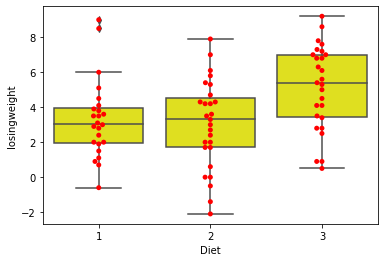

In [ ]:
sns.boxplot(x='Diet',y='losingweight',data = df_diet_losing, color='yellow')
sns.swarmplot(x='Diet',y='losingweight', data = df_diet_losing, color='red')
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
model = ols('losingweight ~ C(Diet)', data=df_diet_losing).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


In [ ]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [ ]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,6.197447,0.003229,Chấp nhận H1 với mức ý nghĩa 0.05


**Kiểm tra hậu nghiệm**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=df_diet_losing['losingweight'],
                         groups=df_diet_losing['Diet'],
                         alpha=0.05)

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


**Kiểm tra các điều kiện cho kiểm định Anova**

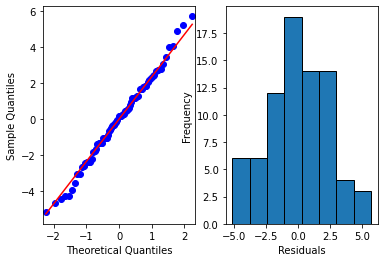

In [ ]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_v = stats.shapiro(model.resid)[1]

**Kiểm tra sự phân phối chuẩn**

In [ ]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn


In [ ]:
df_gen_losingweight = df[['gender','losingweight']].copy()

In [ ]:
df_gen_losingweight = df_gen_losingweight.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_gen_losingweight = df_gen_losingweight.dropna()

In [ ]:
df_gen_losingweight

,gender,losingweight
2,0,3.8
3,0,6.0
4,0,0.7
5,0,2.9
6,0,2.8
...,...,...
73,1,2.8
74,1,4.1
75,1,5.3
76,1,9.2


**SỰ KHÁC NHAU VỀ HIỆU QUẢ GIẢM CÂN VỚI CÁC GIỚI TÍNH KHÁC NHAU**

**Phát biểu giải thuyết thống kê**
- **H0**: không có sự khác biệt về hiệu quả giảm cân đối với các giới tính khác nhau
- **H1**: Các giới khác nhau về hiệu quả giảm cân

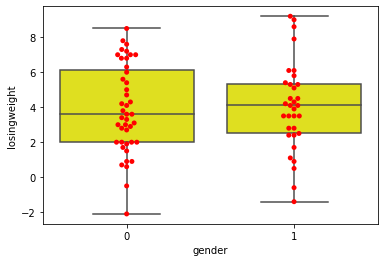

In [ ]:
sns.boxplot(x='gender',y='losingweight',data = df_gen_losingweight, color='yellow')
sns.swarmplot(x='gender',y='losingweight', data = df_gen_losingweight, color='red')
plt.show()

In [ ]:
model_2 = ols('losingweight ~ C(gender)', data=df_gen_losingweight).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [ ]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận H0 với mức ý nghĩa 0.05


**Không cần tiến hành kiểm tra hậu nghiệm**

**Kiểm tra các điều kiện cho kiểm định Anova**

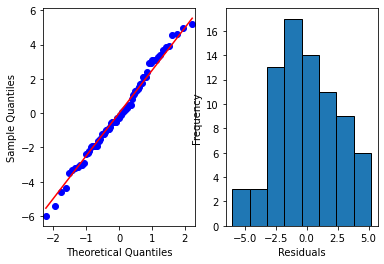

In [ ]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model_2.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_v = stats.shapiro(model_2.resid)[1]

In [ ]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn
